In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data  =  pd.read_csv('AirBNB.csv')
data.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


# EDA

In [3]:
# Check top few records to get a feel of the data structure
data.head(10)

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2,1.0,moderate,True,t,40.0,0.0,1.0,4.744932
5,12422935,Private room,2,1.0,strict,True,t,100.0,1.0,1.0,4.442651
6,11825529,Entire home/apt,3,1.0,moderate,True,t,97.0,1.0,1.0,4.418841
7,13971273,Entire home/apt,2,1.0,moderate,True,f,93.0,1.0,1.0,4.787492
8,180792,Private room,2,1.0,moderate,True,f,99.0,1.0,1.0,4.787492
9,5385260,Private room,2,1.0,moderate,True,t,90.0,1.0,1.0,3.583519


In [4]:
# drop the id column as it is useless for the model
data.drop('id', axis  =1  , inplace=True)

In [5]:
data.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74111 non-null  object 
 1   accommodates          74111 non-null  int64  
 2   bathrooms             73911 non-null  float64
 3   cancellation_policy   74111 non-null  object 
 4   cleaning_fee          74111 non-null  bool   
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74020 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: bool(1), float64(5), int64(1), object(3)
memory usage: 5.2+ MB


In [7]:
data.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,74111.000000,73911.000000,57389.000000,74020.000000,73980.000000,74111.000000
mean,3.155146,1.235263,94.067365,1.265793,1.710868,4.782069
std,2.153589,0.582044,7.836556,0.852143,1.254142,0.717394
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


In [8]:
data.describe(include="O")

,room_type,cancellation_policy,instant_bookable
count,74111,74111,74111
unique,3,5,2
top,Entire home/apt,strict,f
freq,41310,32374,54660


In [10]:
data_num  =  data.select_dtypes('number')
data_num.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
0,3,1.0,100.0,1.0,1.0,5.010635
1,7,1.0,93.0,3.0,3.0,5.129899
2,5,1.0,92.0,1.0,3.0,4.976734
3,4,1.0,NaN,2.0,2.0,6.620073
4,2,1.0,40.0,0.0,1.0,4.744932


In [12]:
data_cat  =  data.select_dtypes('object')
data_cat.head()

,room_type,cancellation_policy,instant_bookable
0,Entire home/apt,strict,f
1,Entire home/apt,strict,t
2,Entire home/apt,moderate,t
3,Entire home/apt,flexible,f
4,Entire home/apt,moderate,t


In [13]:
print(data_cat.room_type.value_counts())

Entire home/apt    41310
Private room       30638
Shared room         2163
Name: room_type, dtype: int64


In [14]:
print(data_cat.cancellation_policy.value_counts())

strict             32374
flexible           22545
moderate           19063
super_strict_30      112
super_strict_60       17
Name: cancellation_policy, dtype: int64


In [15]:
data.instant_bookable.dtype

dtype('O')

In [16]:
data.instant_bookable.value_counts()

f    54660
t    19451
Name: instant_bookable, dtype: int64

In [17]:
# Are there any missing values ?
#percentage --> 25% drop that entire/ make sure that the column you are is not imprtant
data.isnull().sum() / len(data) * 100

room_type                0.000000
accommodates             0.000000
bathrooms                0.269865
cancellation_policy      0.000000
cleaning_fee             0.000000
instant_bookable         0.000000
review_scores_rating    22.563452
bedrooms                 0.122789
beds                     0.176762
log_price                0.000000
dtype: float64

<Axes: >

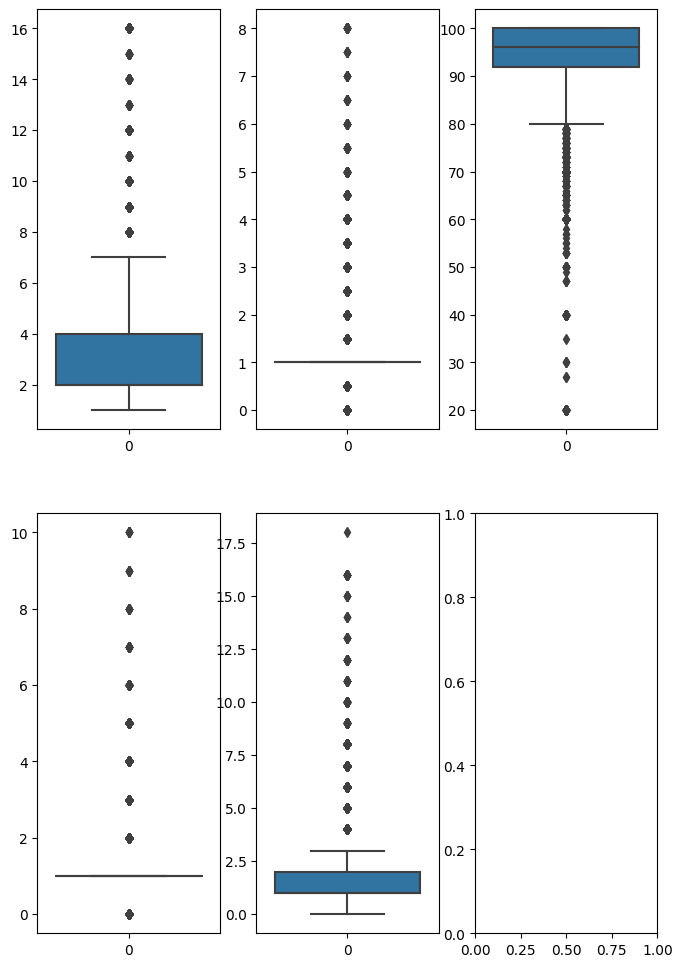

In [19]:
#treat outlier

#accommodates  bathrooms  review_scores_rating  bedrooms  beds 
fig , ax  =  plt.subplots(2,3, figsize  =(8, 12))
sns.boxplot(data.accommodates , ax= ax[0, 0])
sns.boxplot(data.bathrooms , ax= ax[0, 1])
sns.boxplot(data.review_scores_rating , ax= ax[0, 2])
sns.boxplot(data.bedrooms , ax= ax[1, 0])
sns.boxplot(data.beds , ax= ax[1, 1])

In [20]:
#outlier treatment

def find_boundaries(variable):
    
    q1  = data[variable].quantile(0.25)
    q3  = data[variable].quantile(0.75)
    iqr = q3  - q1
    lower_range  = q1  - 1.5 * iqr #used to find the minimum value
    upper_range  = q3 +  1.5 * iqr #max value
    return lower_range , upper_range

In [24]:
lower_bathrooms , upper_bathrooms  =  find_boundaries('bathrooms')
print(lower_bathrooms , upper_bathrooms)

#capp the outlier / censoring the outlier
data.bathrooms = np.where( data.bathrooms > upper_bathrooms , upper_bathrooms , data.bathrooms )
data.bathrooms  = np.where(data.bathrooms < lower_bathrooms , lower_bathrooms , data.bathrooms)

1.0 1.0


In [25]:
data.bathrooms.value_counts()

1.0    73911
Name: bathrooms, dtype: int64

<Axes: >

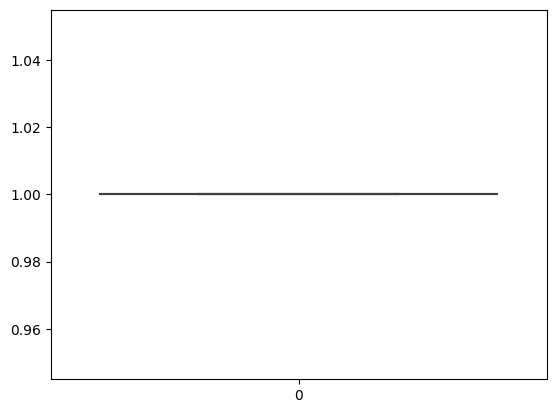

In [26]:
sns.boxplot(data.bathrooms) #recheck the bathroom to see if any outliers are still present

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74111 non-null  object 
 1   accommodates          74111 non-null  int64  
 2   bathrooms             73911 non-null  float64
 3   cancellation_policy   74111 non-null  object 
 4   cleaning_fee          74111 non-null  bool   
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74020 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: bool(1), float64(5), int64(1), object(3)
memory usage: 5.2+ MB


In [28]:
data.bathrooms = data.bathrooms.fillna(data.bathrooms.median())
data.review_scores_rating  = data.review_scores_rating.fillna(data.review_scores_rating.median())
data.bedrooms = data.bedrooms.fillna(data.bedrooms.median())
data.beds  = data.beds.fillna(data.beds.median())


In [30]:
data.isnull().sum()/ len(data)*100

room_type               0.0
accommodates            0.0
bathrooms               0.0
cancellation_policy     0.0
cleaning_fee            0.0
instant_bookable        0.0
review_scores_rating    0.0
bedrooms                0.0
beds                    0.0
log_price               0.0
dtype: float64

In [31]:
data.duplicated().sum()

24690

In [32]:
#drop duplicated values
data.drop_duplicates(inplace=True)

In [33]:
data.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,49421.000000,49421.0,49421.000000,49421.000000,49421.000000,49421.000000
mean,3.608061,1.0,93.509986,1.371381,1.962162,4.884315
std,2.389721,0.0,7.852900,0.976263,1.419179,0.758392
min,1.000000,1.0,20.000000,0.000000,0.000000,0.000000
25%,2.000000,1.0,92.000000,1.000000,1.000000,4.382027
50%,3.000000,1.0,96.000000,1.000000,2.000000,4.828314
75%,4.000000,1.0,98.000000,2.000000,2.000000,5.298317
max,16.000000,1.0,100.000000,10.000000,18.000000,7.600402


In [34]:
data.describe(include="O")

,room_type,cancellation_policy,instant_bookable
count,49421,49421,49421
unique,3,5,2
top,Entire home/apt,strict,f
freq,31978,23035,34050


<Axes: >

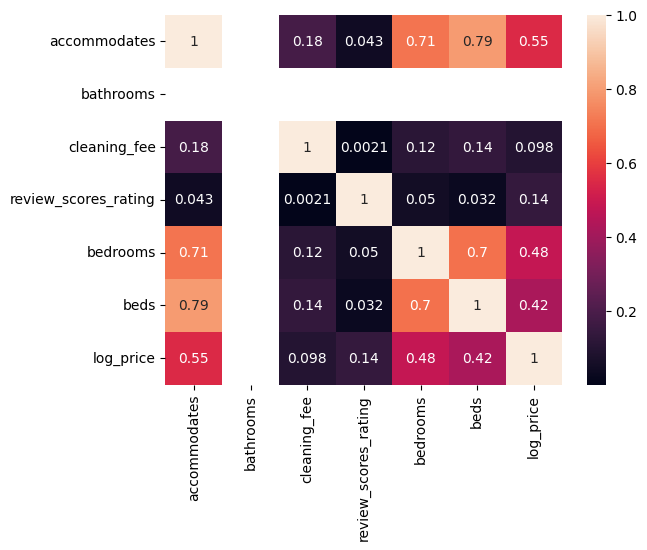

In [35]:
sns.heatmap(data.corr(), annot=True) #filter method to select important feature

# The variable 'Accommodates', 'bedrooms','bathrooms', 'beds' are having correlation with each other

In [36]:
#to satify the multicollinearity of Linear regression
#i will drop accomodates columns
data.drop('accommodates' , inplace=True, axis  =1)

In [37]:
data.head()

,room_type,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,1.0,flexible,True,f,96.0,2.0,2.0,6.620073
4,Entire home/apt,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [38]:
#room_type cancellation_policy cleaning_fee	instant_bookable
from sklearn.preprocessing import LabelEncoder

enc  = LabelEncoder()
data[['cleaning_fee','instant_bookable']] = data[['cleaning_fee','instant_bookable']].apply(enc.fit_transform)

data[['cleaning_fee','instant_bookable']]

,cleaning_fee,instant_bookable
0,1,0
1,1,1
2,1,1
3,1,0
4,1,1
...,...,...
74104,1,0
74107,1,0
74108,1,1
74109,1,1


In [39]:
#get dummies 
df  = pd.get_dummies(data[['room_type','cancellation_policy']])

final_data  = pd.concat([data, df], axis=1)
final_data.drop(['room_type','cancellation_policy'], axis  = 1 , inplace=True)

final_data

,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,1.0,1,0,100.0,1.0,1.0,5.010635,1,0,0,0,0,1,0,0
1,1.0,1,1,93.0,3.0,3.0,5.129899,1,0,0,0,0,1,0,0
2,1.0,1,1,92.0,1.0,3.0,4.976734,1,0,0,0,1,0,0,0
3,1.0,1,0,96.0,2.0,2.0,6.620073,1,0,0,1,0,0,0,0
4,1.0,1,1,40.0,0.0,1.0,4.744932,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,1.0,1,0,100.0,1.0,1.0,4.356709,1,0,0,0,0,1,0,0
74107,1.0,1,0,93.0,2.0,4.0,5.043425,1,0,0,0,1,0,0,0
74108,1.0,1,1,94.0,2.0,2.0,5.220356,1,0,0,0,1,0,0,0
74109,1.0,1,1,96.0,0.0,2.0,5.273000,1,0,0,0,0,1,0,0


In [40]:
final_data.describe()

,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
count,49421.0,49421.000000,49421.000000,49421.000000,49421.000000,49421.000000,49421.000000,49421.000000,49421.000000,49421.000000,49421.000000,49421.000000,49421.000000,49421.000000,49421.000000
mean,1.0,0.747192,0.311022,93.509986,1.371381,1.962162,4.884315,0.647053,0.317436,0.035511,0.264321,0.267093,0.466097,0.002145,0.000344
std,0.0,0.434626,0.462916,7.852900,0.976263,1.419179,0.758392,0.477891,0.465483,0.185070,0.440975,0.442446,0.498854,0.046263,0.018544
min,1.0,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,92.000000,1.000000,1.000000,4.382027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,1.000000,0.000000,96.000000,1.000000,2.000000,4.828314,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,1.000000,1.000000,98.000000,2.000000,2.000000,5.298317,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,1.0,1.000000,1.000000,100.000000,10.000000,18.000000,7.600402,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# X should be all independent variable
# Y should be the dependent variable or output variable 
# For that to happen we should split our data to x and y variable 

In [43]:
#split
x  = final_data.drop('log_price', axis  =1) #input ready
y  = final_data[['log_price']]


In [44]:
x.head()
# all independent variables

,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,1.0,1,0,100.0,1.0,1.0,1,0,0,0,0,1,0,0
1,1.0,1,1,93.0,3.0,3.0,1,0,0,0,0,1,0,0
2,1.0,1,1,92.0,1.0,3.0,1,0,0,0,1,0,0,0
3,1.0,1,0,96.0,2.0,2.0,1,0,0,1,0,0,0,0
4,1.0,1,1,40.0,0.0,1.0,1,0,0,0,1,0,0,0


In [45]:
y.head()
# the dependent variable or output variable

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932


# TRAIN AND TEST SPLIT

In [46]:
from sklearn.model_selection import train_test_split

In [47]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20 , random_state= 200)
X_train

,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
45396,1.0,1,1,100.0,1.0,1.0,1,0,0,0,0,1,0,0
5985,1.0,1,1,100.0,2.0,2.0,1,0,0,1,0,0,0,0
67144,1.0,1,0,100.0,4.0,5.0,1,0,0,0,0,1,0,0
64656,1.0,1,1,87.0,1.0,2.0,1,0,0,0,1,0,0,0
51192,1.0,1,0,96.0,4.0,5.0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60523,1.0,1,1,96.0,1.0,4.0,0,1,0,0,0,1,0,0
69322,1.0,1,1,70.0,1.0,1.0,1,0,0,0,0,1,0,0
790,1.0,1,1,93.0,1.0,1.0,0,1,0,0,0,1,0,0
15512,1.0,1,0,93.0,2.0,6.0,1,0,0,0,0,1,0,0


# MULTIPLE LINEAR REGRESSION MODEL IMPLEMENTATION

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
model = LinearRegression() #model initialization 
model 

LinearRegression()

In [50]:
#training phase of the model
model.fit(X_train , y_train)  #passing 80 percent input and output to train the model
predictions  =  model.predict(X_test)

y_test.shape

(9885, 1)

In [52]:
predictions

array([[4.25445557],
       [3.8157959 ],
       [5.66717529],
       ...,
       [4.58612061],
       [4.30578613],
       [4.39971924]])

In [53]:
y_test

,log_price
48854,5.003946
13404,4.382027
57792,5.030438
10120,4.317488
13311,5.068904
...,...
24503,4.682131
19320,4.276666
59811,4.744932
35938,4.499810


# MODEL EVALUATION
- for Regression methods, we use R2 score, Mean Squared Error, Mean Absolute Error, Adjusted R2

In [54]:
from sklearn.metrics import mean_squared_error , r2_score 

mse  = np.sqrt(mean_squared_error(y_test, predictions))  #RMSE
print(mse)

print(r2_score(y_test, predictions))

0.5555465028969047
0.4634044541220663


In [55]:
# model accuracy according to mse = 55%
# model accuracy according to r2_score = 46%

In [56]:
# Find adjusted R2 Score and Mean absolute error